# matplotlib 基本概念-`fig`-`ax`

In [2]:
# 导入所需要的包
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

## 图形 `Figure` 
`Figure` 是 Matplotlib 中的顶层容器，它用于容纳所有子坐标轴（`Axes`）、一组特殊的图元（如标题、图例、色条等）以及嵌套的子图。一个图形可以包含一个或多个子 `Axes`。

以下是一些创建 `Figure` 的示例：

1. 创建一个空白的 `Figure`。

In [3]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

2. 创建一个带有 `Axes` 的 `Figure`。

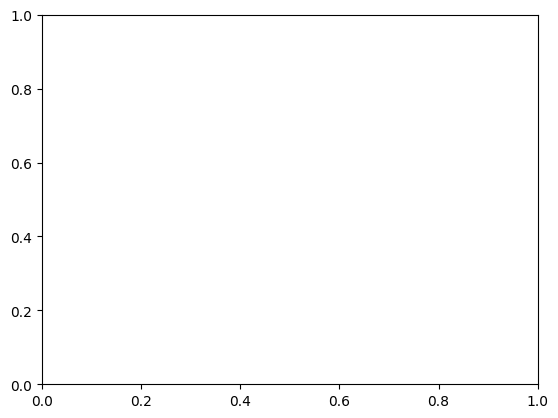

In [4]:
fig, ax = plt.subplots()

3. 创建一个带有 2x2 `Axes` 的 `Figure`，即一共 4 个 `Axes`。

当存在多个 Axes 时，可以用变量 `axs` 指向各个 Axes，用 `axs[x, y]` 选择一个子图，然后在子图上面作图。

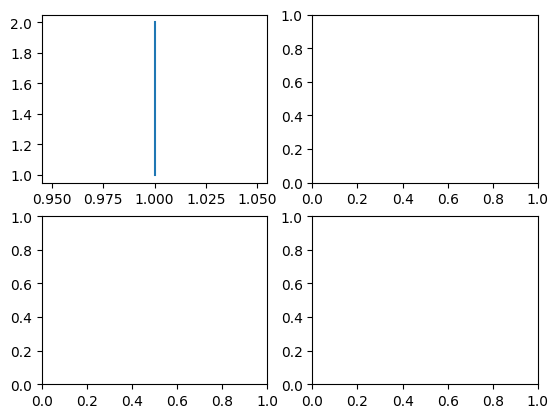

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot([1, 1], [1, 2])

也可以像下面这样获得各个子图。

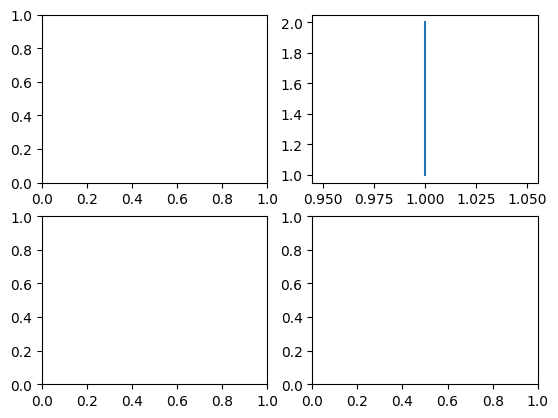

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax2.plot([1, 1], [1, 2])

4. 创建一个带有一个左侧 `Axes` 和两个右侧 `Axes` 的 `Figure`。

这里我们使用了 `subplot_mosaic()` 方法，它可以设置更复杂的布局。

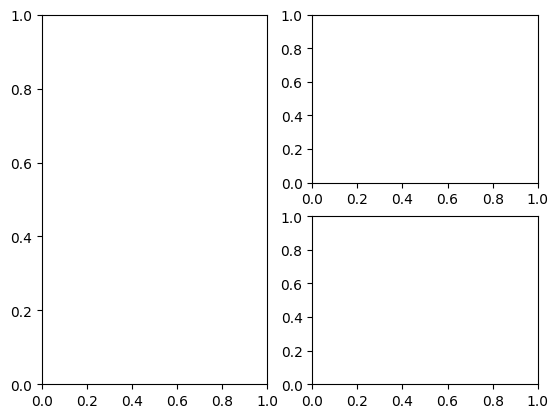

In [7]:
fig, axs = plt.subplot_mosaic([['left', 'right_top'], ['left', 'right_bottom']])

5. 创建一个尺寸大小为 5*2.7 的 Figure，布局参数 layout 设置为 `constrained`。

`figsize` 和 `layout` 是 `Figure` 对象的参数，`figsize` 用来指定画布大小，`layout` 用于指定绘图中的元素布局机制，以避免重叠的坐标轴装饰（例如标签、刻度等）。

具体来说，`layout` 参数有：
- `constrained`（默认值）：约束布局（Constrained Layout）机制会自动调整坐标轴的大小，以避免坐标轴装饰重叠。它适用于复杂的绘图布局，可以处理具有多个坐标轴和色条的情况，通常是推荐的选项。

- `compressed`：使用与 `constrained` 相同的算法，但去除了固定纵横比坐标轴之间的额外间隔。最适合简单的坐标轴网格。

- `tight`：使用紧凑布局机制，这是一个相对简单的算法，调整子图参数以避免装饰重叠。

- `none`：不应用特定的布局机制，子图的布局将遵循默认行为。


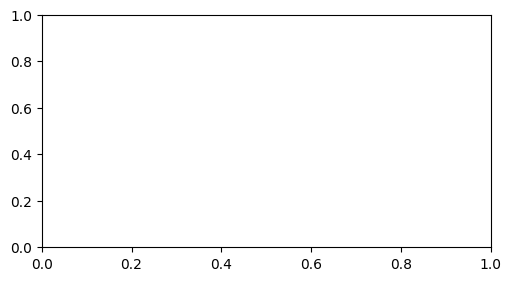

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

### 坐标轴 `Axes`
坐标轴（`Axes`）是附加到图形（`Figure`）的一个图元（`Artist`）。每个 `Axes` 是具体绘制数据的区域，通常包括两个坐标轴对象（`Axis`），在 3D 情况下为三个坐标轴对象。每个坐标轴对象都有刻度线和刻度标签，用于为坐标轴上的数据提供刻度标尺。每个 Axes 还可以具有标题（通过 `set_title()` 方法设置）、x 轴标签（通过 `set_xlabel()` 方法设置）和 y 轴标签（通过 `set_ylabel()` 方法设置）。

Axes 类提供了很多成员方法，用来对这个 Axes 进行细粒度的刻画。Axes 类基于面向对象编程（OOP）思想。例如，上面提到的 `ax.plot()` 使用 `plot()` 方法绘制线图。

```{note}
注意不要混淆 `Axes` 和 `Axis`。 `Axes`（复数形式）通常指的是一个子图，严谨地说，`Axes` 是一个绘图区域或数据可视化的区域，可以在这个区域创建和展示数据图表。一个 `Axes` 对象通常包括 x 轴和 y 轴，用于绘制和展示数据。`Axis`（单数形式）通常指的是坐标轴，例如 x 轴或 y 轴，它用于设置刻度、刻度标签和控制坐标轴的属性。Matplotlib 中的 `Axis` 对象负责管理坐标轴上的刻度和刻度标签。
```

#### `Axis` 对象设置

`ax.set()` 方法接受一个包含关键字参数的字典，每个关键字对应一个坐标轴属性，用来精细化地设置 `Axis` 对象。具体来说，`xlim` 和 `ylim` 分别设置 x 轴和 y 轴的范围，`xticks` 和 `yticks` 分别设置 x 轴和 y 轴上的刻度位置。或者直接使用 `ax.set_xlim()`, `ax.set_ylim()`, `ax.set_xticks()`, `ax.set_yticks()` 等方法设置这些参数。一方面，这种设置可以帮助我们调整图形的外观，更符合需求；另一方面，也可以规避一些错误。

例如，

（1）设置 x 轴的范围是 0 到 4，刻度是 1 到 3；y 轴的范围是 0 到 3，刻度是 1 到 2。

（2）设置 x 轴的范围是 0 到 4，刻度是 1 到 3；y 轴的范围是 0 到 11，刻度是 1 到 2。

可以发现，当改变 y 轴范围时，同样的波动在视觉上会变小，有时候会影响判断。

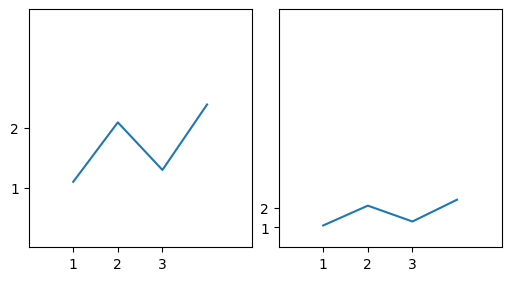

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5, 2.7), layout='constrained')

ax1.set(xlim=(0, 5), xticks=np.arange(1, 4),
       ylim=(0, 4), yticks=np.arange(1, 3))
ax1.plot([1,2,3,4],[1.1, 2.1, 1.3, 2.4])

ax2.set(xlim=(0, 5), xticks=np.arange(1, 4),
       ylim=(0, 12), yticks=np.arange(1, 3))
ax2.plot([1,2,3,4],[1.1, 2.1, 1.3, 2.4])